# Breast Cancer Diagnostic 

The idea of this mini-project is to apply data processing, apply some algorithm models and compare the metrics of each one, and then choose which one has the best performance

The dataset can be found in [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

## Steps:
  - Prepare data for use
    - Read
    - Clean
    - Separate
  - Plot information to gain insights
  - Train a model
  - Checking the results

## Importing libs

In [960]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB


from imblearn.over_sampling import SMOTE

from lazypredict.Supervised import LazyClassifier

In [961]:
warnings.filterwarnings('ignore')

## Loading and viewing data

In [962]:
# Carregando os dados
df = pd.read_csv('./data/wdbc.data', header=None, delimiter = ',', encoding = 'utf-8')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [963]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

We can see there is no empty values.

In [964]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,30371831.43,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,125020585.61,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,869218.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,906024.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,8813129.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [965]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,1
count,569
unique,2
top,B
freq,357


There's 357 benign (B) cases, and 212 malignant (M).

## Data Preprocessing

Now, the column 1 is `1` when the the Diagnosis is *Malignant*, and `0` when it's *Benign*.

In [966]:
le = LabelEncoder()
df[1] = le.fit_transform(df[1])         # Malignant  = 1, Benign = 0
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,1,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,1,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,1,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


Normalize the continues values

In [967]:
mms = MinMaxScaler()
for i in range(2, 32):
    df[i] = mms.fit_transform(df[i].values.reshape(-1, 1))

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,0.52,0.02,0.55,0.36,0.59,0.79,0.70,0.73,...,0.62,0.14,0.67,0.45,0.60,0.62,0.57,0.91,0.60,0.42
1,842517,1,0.64,0.27,0.62,0.50,0.29,0.18,0.20,0.35,...,0.61,0.30,0.54,0.44,0.35,0.15,0.19,0.64,0.23,0.22
2,84300903,1,0.60,0.39,0.60,0.45,0.51,0.43,0.46,0.64,...,0.56,0.36,0.51,0.37,0.48,0.39,0.36,0.84,0.40,0.21
3,84348301,1,0.21,0.36,0.23,0.10,0.81,0.81,0.57,0.52,...,0.25,0.39,0.24,0.09,0.92,0.81,0.55,0.88,1.00,0.77
4,84358402,1,0.63,0.16,0.63,0.49,0.43,0.35,0.46,0.52,...,0.52,0.12,0.51,0.34,0.44,0.17,0.32,0.56,0.16,0.14


## Exploring the data

Checking if the dataset is balanced:

1
0    357
1    212
Name: count, dtype: int64

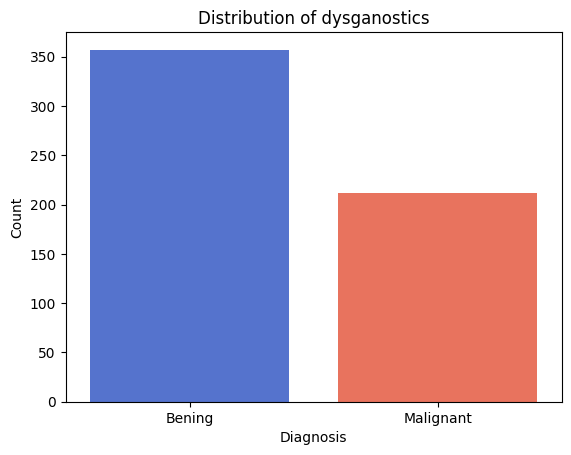

In [968]:
colors = {'Bening': '#4169E1', 'Malignant': '#FF6347'}
ax = sns.countplot(x=df[1], palette=colors.values())
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Count')
ax.set_title('Distribution of dysganostics')
ax.set_xticklabels(['Bening', 'Malignant'])
df[1].value_counts()

We can see that the data set is relatively balanced.

Checking the correlation between features:

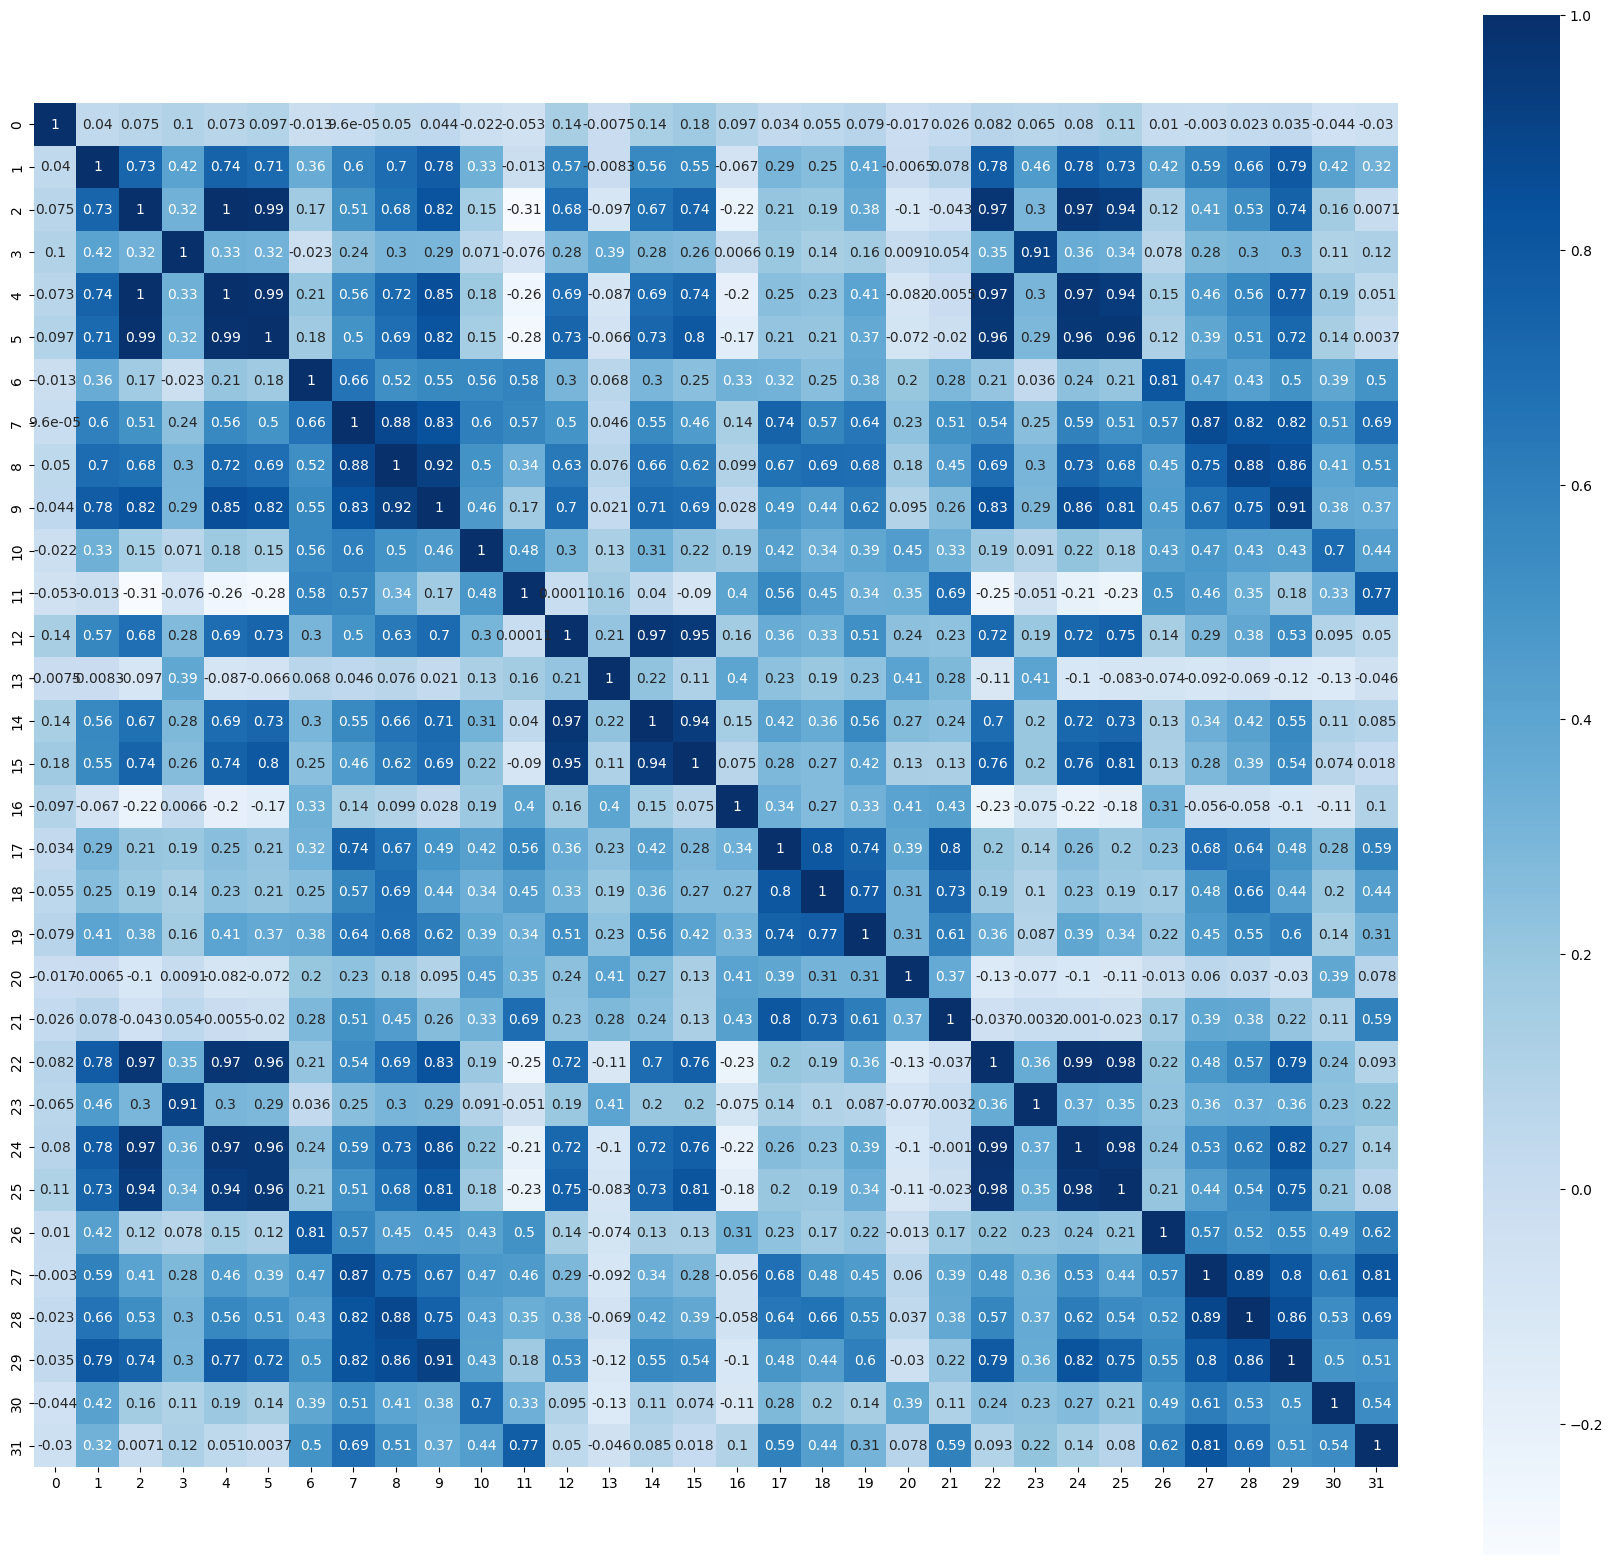

In [969]:
correlation = df.corr(method = 'pearson')

fig = plt.subplots(figsize = (22,20))
sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = 'Blues');

## Split of data

In [970]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,0.52,0.02,0.55,0.36,0.59,0.79,0.70,0.73,...,0.62,0.14,0.67,0.45,0.60,0.62,0.57,0.91,0.60,0.42
1,842517,1,0.64,0.27,0.62,0.50,0.29,0.18,0.20,0.35,...,0.61,0.30,0.54,0.44,0.35,0.15,0.19,0.64,0.23,0.22
2,84300903,1,0.60,0.39,0.60,0.45,0.51,0.43,0.46,0.64,...,0.56,0.36,0.51,0.37,0.48,0.39,0.36,0.84,0.40,0.21
3,84348301,1,0.21,0.36,0.23,0.10,0.81,0.81,0.57,0.52,...,0.25,0.39,0.24,0.09,0.92,0.81,0.55,0.88,1.00,0.77
4,84358402,1,0.63,0.16,0.63,0.49,0.43,0.35,0.46,0.52,...,0.52,0.12,0.51,0.34,0.44,0.17,0.32,0.56,0.16,0.14


In [971]:
x = df.drop([0,1], axis = 1).values
y = df[1]

1
1    357
0    357
Name: count, dtype: int64

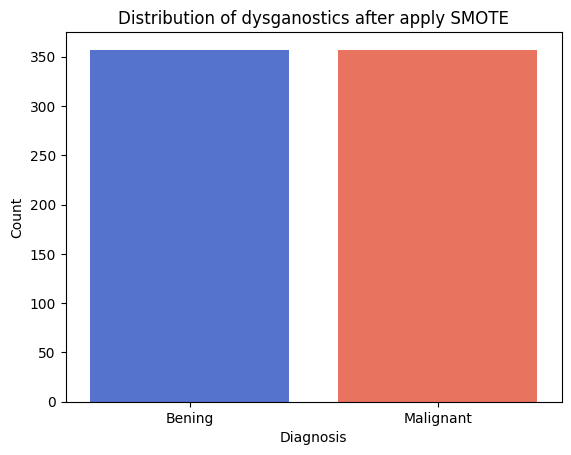

In [972]:
# Treating the problem of unbalanced data with SMOTE that generates synthetic data to balance the data
smote = SMOTE(random_state = 3)
x_smote, y_smote = smote.fit_resample(x, y)

colors = {'Bening': '#4169E1', 'Malignant': '#FF6347'}
ax = sns.countplot(x=y_smote, palette=colors.values())
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Count')
ax.set_title('Distribution of dysganostics after apply SMOTE')
ax.set_xticklabels(['Bening', 'Malignant'])
y_smote.value_counts()

In [973]:
# x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42) # using data from SMOTE
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


## Applying ML algorithms

Finally we can choose a model and train it from our data.

Lets test:
- `KNeighborsClassifier`
- `DecisionTreeClassifier`
- `SVC`
- `Naive Bayes Multinomial`
- `Gaussian Naive Bayes`

### KNeighborsClassifier

In [974]:
KNN_model = KNeighborsClassifier(n_neighbors=7)

In [975]:
KNN_score = cross_val_score(KNN_model, x_train, y_train, cv = 5, scoring = 'accuracy')
KNN_score

array([0.94505495, 0.95604396, 0.98901099, 0.97802198, 0.92307692])

In [976]:
KNN_model.fit(x_train, y_train)
y_pred_KNN = KNN_model.predict(x_test)

In [977]:
print(classification_report(y_pred_KNN, y_test))
print(accuracy_score(y_pred_KNN, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

0.9649122807017544


In [978]:
predicted_probab_KNN = KNN_model.predict_proba(x_test)
predicted_probab_KNN = predicted_probab_KNN[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_KNN)

auc_KNN = roc_auc_score(y_test, predicted_probab_KNN)

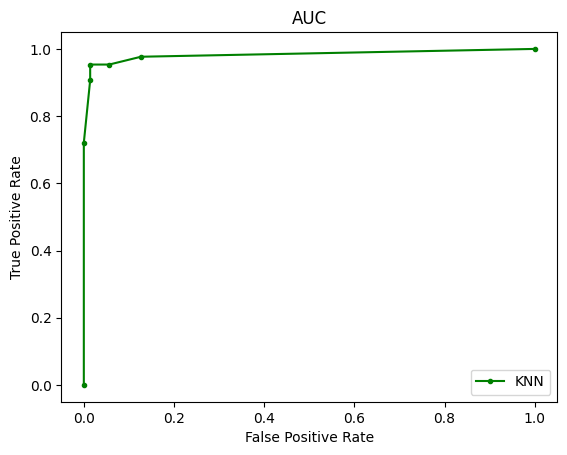

AUC Score:  0.9828037995414345


In [979]:
plt.plot(fpr, tpr, marker = '.', color = 'Green', label = 'KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')   
plt.legend(loc = 4)
plt.show()
print('AUC Score: ', auc_KNN)

Text(0.5, 1.0, 'Confusion Matrix (Values and Percentages)')

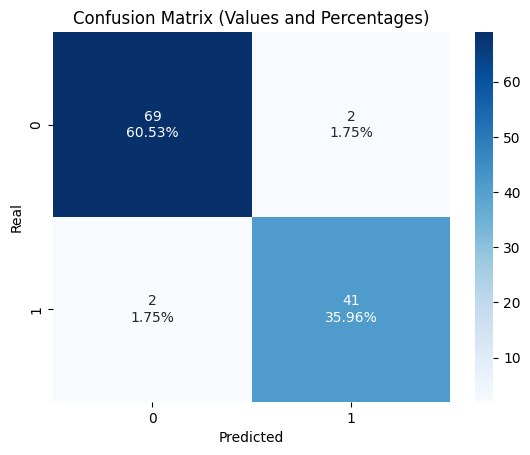

In [980]:
confusion_matrix = pd.crosstab(y_test, y_pred_KNN, rownames = ['Real'], colnames = ['Predicted'])

# Calculate percentages
total_sum = confusion_matrix.to_numpy().sum()
percentages = (confusion_matrix / total_sum * 100).round(2).astype(str) + '%'

# Combine values ​​and percentages into a single string
combined = confusion_matrix.astype(str) + '\n' + percentages

# Plot the confusion matrix with values ​​and percentages
sns.heatmap(confusion_matrix, annot=combined, cmap='Blues', fmt='')
plt.title('Confusion Matrix (Values and Percentages)')

### DecisionTreeClassifier

In [981]:
DTC_model = DecisionTreeClassifier()

DTC_score = cross_val_score(DTC_model, x_train, y_train, cv = 5, scoring = 'accuracy')
DTC_score

array([0.89010989, 0.92307692, 0.94505495, 0.9010989 , 0.9010989 ])

In [982]:
DTC_model.fit(x_train, y_train)
y_pred_DTC = DTC_model.predict(x_test)

print(classification_report(y_pred_DTC, y_test))
print(accuracy_score(y_pred_DTC, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

0.9298245614035088


In [983]:
predicted_probab_DTC = DTC_model.predict_proba(x_test)
predicted_probab_DTC = predicted_probab_DTC[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_DTC)

auc_DTC = roc_auc_score(y_test, predicted_probab_DTC)

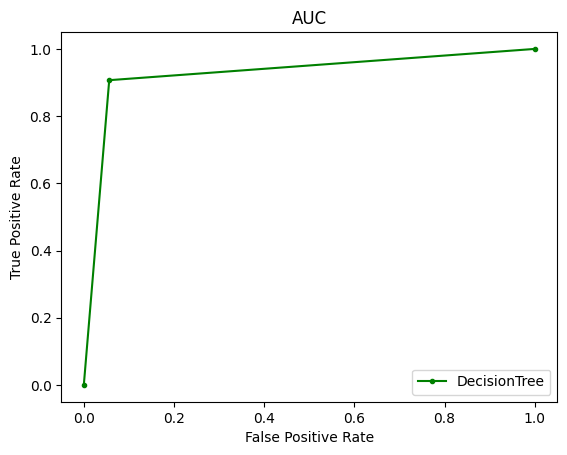

AUC Score:  0.9253193580085161


In [984]:
plt.plot(fpr, tpr, marker = '.', color = 'Green', label = 'DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')   
plt.legend(loc = 4)
plt.show()
print('AUC Score: ', auc_DTC)

Text(0.5, 1.0, 'Confusion Matrix (Values and Percentages)')

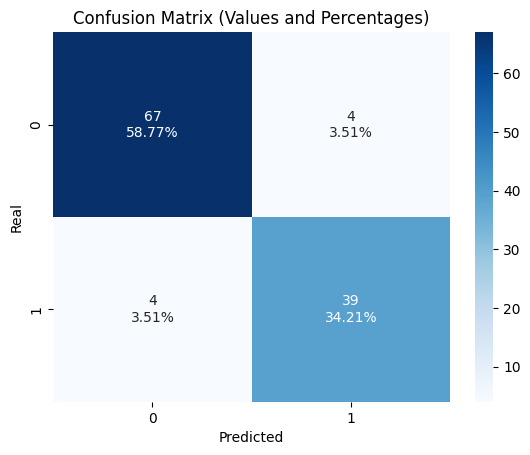

In [985]:
confusion_matrix = pd.crosstab(y_test, y_pred_DTC, rownames = ['Real'], colnames = ['Predicted'])

# Calculate percentages
total_sum = confusion_matrix.to_numpy().sum()
percentages = (confusion_matrix / total_sum * 100).round(2).astype(str) + '%'

# Combine values ​​and percentages into a single string
combined = confusion_matrix.astype(str) + '\n' + percentages

# Plot the confusion matrix with values ​​and percentages
sns.heatmap(confusion_matrix, annot=combined, cmap='Blues', fmt='')
plt.title('Confusion Matrix (Values and Percentages)')

### SVC

In [986]:
SVC_model = SVC(probability=True)

SVC_score = cross_val_score(SVC_model, x_train, y_train, cv = 5, scoring = 'accuracy')
SVC_score

array([0.98901099, 0.96703297, 0.98901099, 0.98901099, 0.97802198])

In [987]:
SVC_model.fit(x_train, y_train)
y_pred_SVC = SVC_model.predict(x_test)

print(classification_report(y_pred_SVC, y_test))
print(accuracy_score(y_pred_SVC, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

0.9736842105263158


In [988]:
predicted_probab_SVC = SVC_model.predict_proba(x_test)
predicted_probab_SVC = predicted_probab_SVC[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_SVC)

auc_SVC = roc_auc_score(y_test, predicted_probab_SVC)

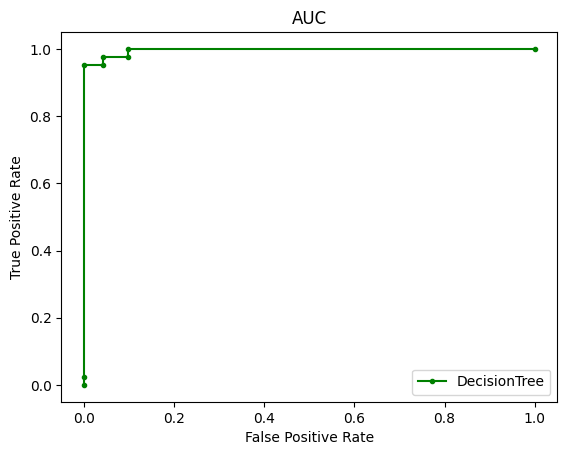

AUC Score:  0.9967245332459875


In [989]:
plt.plot(fpr, tpr, marker = '.', color = 'Green', label = 'DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')   
plt.legend(loc = 4)
plt.show()
print('AUC Score: ', auc_SVC)

Text(0.5, 1.0, 'Confusion Matrix (Values and Percentages)')

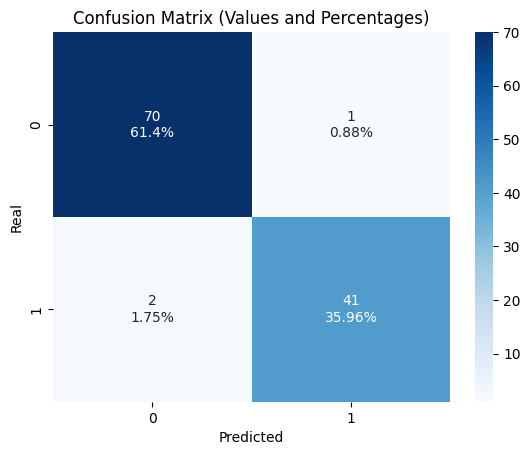

In [990]:
confusion_matrix = pd.crosstab(y_test, y_pred_SVC, rownames = ['Real'], colnames = ['Predicted'])

# Calculate percentages
total_sum = confusion_matrix.to_numpy().sum()
percentages = (confusion_matrix / total_sum * 100).round(2).astype(str) + '%'

# Combine values ​​and percentages into a single string
combined = confusion_matrix.astype(str) + '\n' + percentages

# Plot the confusion matrix with values ​​and percentages
sns.heatmap(confusion_matrix, annot=combined, cmap='Blues', fmt='')
plt.title('Confusion Matrix (Values and Percentages)')

### Multinomial Naive Bayes

In [991]:
MNB_model = MultinomialNB()

MNB_score = cross_val_score(MNB_model, x_train, y_train, cv = 5, scoring = 'accuracy')
MNB_score

array([0.83516484, 0.79120879, 0.92307692, 0.81318681, 0.81318681])

In [992]:
MNB_model.fit(x_train, y_train)
y_pred_MNB = MNB_model.predict(x_test)

print(classification_report(y_pred_MNB, y_test))
print(accuracy_score(y_pred_MNB, y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        90
           1       0.56      1.00      0.72        24

    accuracy                           0.83       114
   macro avg       0.78      0.89      0.80       114
weighted avg       0.91      0.83      0.85       114

0.8333333333333334


In [993]:
predicted_probab_MNB = MNB_model.predict_proba(x_test)
predicted_probab_MNB = predicted_probab_MNB[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_MNB)

auc_MNB = roc_auc_score(y_test, predicted_probab_MNB)

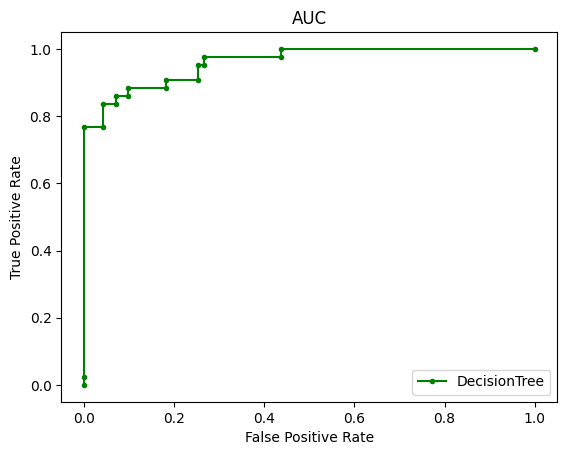

AUC Score:  0.9606943989518506


In [994]:
plt.plot(fpr, tpr, marker = '.', color = 'Green', label = 'DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')   
plt.legend(loc = 4)
plt.show()
print('AUC Score: ', auc_MNB)

Text(0.5, 1.0, 'Confusion Matrix (Values and Percentages)')

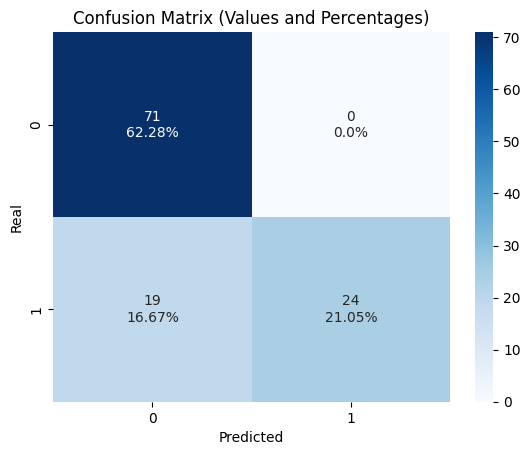

In [995]:
confusion_matrix = pd.crosstab(y_test, y_pred_MNB, rownames = ['Real'], colnames = ['Predicted'])

# Calculate percentages
total_sum = confusion_matrix.to_numpy().sum()
percentages = (confusion_matrix / total_sum * 100).round(2).astype(str) + '%'

# Combine values ​​and percentages into a single string
combined = confusion_matrix.astype(str) + '\n' + percentages

# Plot the confusion matrix with values ​​and percentages
sns.heatmap(confusion_matrix, annot=combined, cmap='Blues', fmt='')
plt.title('Confusion Matrix (Values and Percentages)')

### Gaussian Naive Bayes

In [996]:
GNB_model = GaussianNB()

GNB_score = cross_val_score(GNB_model, x_train, y_train, cv = 5, scoring = 'accuracy')
GNB_score

array([0.9010989 , 0.96703297, 0.93406593, 0.93406593, 0.93406593])

In [997]:
GNB_model.fit(x_train, y_train)
y_pred_GNB = GNB_model.predict(x_test)

print(classification_report(y_pred_GNB, y_test))
print(accuracy_score(y_pred_GNB, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        73
           1       0.93      0.98      0.95        41

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

0.9649122807017544


In [998]:
predicted_probab_GNB = GNB_model.predict_proba(x_test)
predicted_probab_GNB = predicted_probab_GNB[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_GNB)

auc_GNB = roc_auc_score(y_test, predicted_probab_GNB)

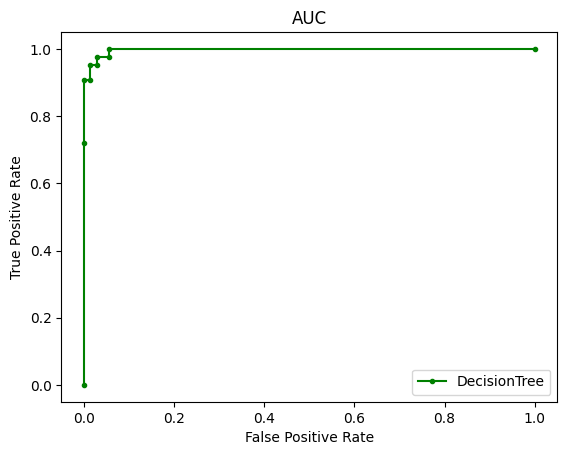

AUC Score:  0.99737962659679


In [999]:
plt.plot(fpr, tpr, marker = '.', color = 'Green', label = 'DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')   
plt.legend(loc = 4)
plt.show()
print('AUC Score: ', auc_GNB)

Text(0.5, 1.0, 'Confusion Matrix (Values and Percentages)')

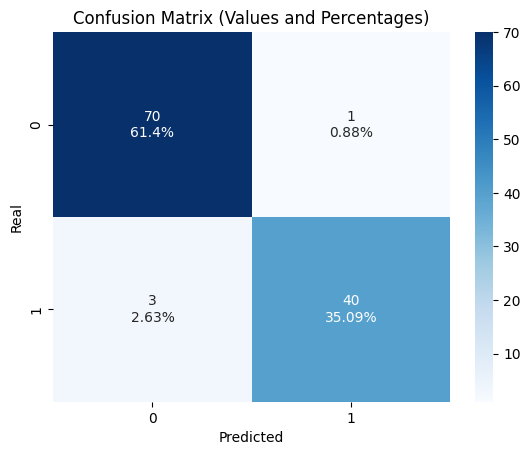

In [1000]:
confusion_matrix = pd.crosstab(y_test, y_pred_GNB, rownames = ['Real'], colnames = ['Predicted'])

# Calculate percentages
total_sum = confusion_matrix.to_numpy().sum()
percentages = (confusion_matrix / total_sum * 100).round(2).astype(str) + '%'

# Combine values ​​and percentages into a single string
combined = confusion_matrix.astype(str) + '\n' + percentages

# Plot the confusion matrix with values ​​and percentages
sns.heatmap(confusion_matrix, annot=combined, cmap='Blues', fmt='')
plt.title('Confusion Matrix (Values and Percentages)')

## Comparing Results

            Model  Accuracy  AUC  Precision  Recall  F1-Score
0             KNN     96.49 0.98      95.35   95.35     95.35
1   Decision Tree     92.98 0.93      90.70   90.70     90.70
2             SVC     97.37 1.00      97.62   95.35     96.47
3  Multinomial NB     83.33 0.96     100.00   55.81     71.64
4     Gaussian NB     96.49 1.00      97.56   93.02     95.24


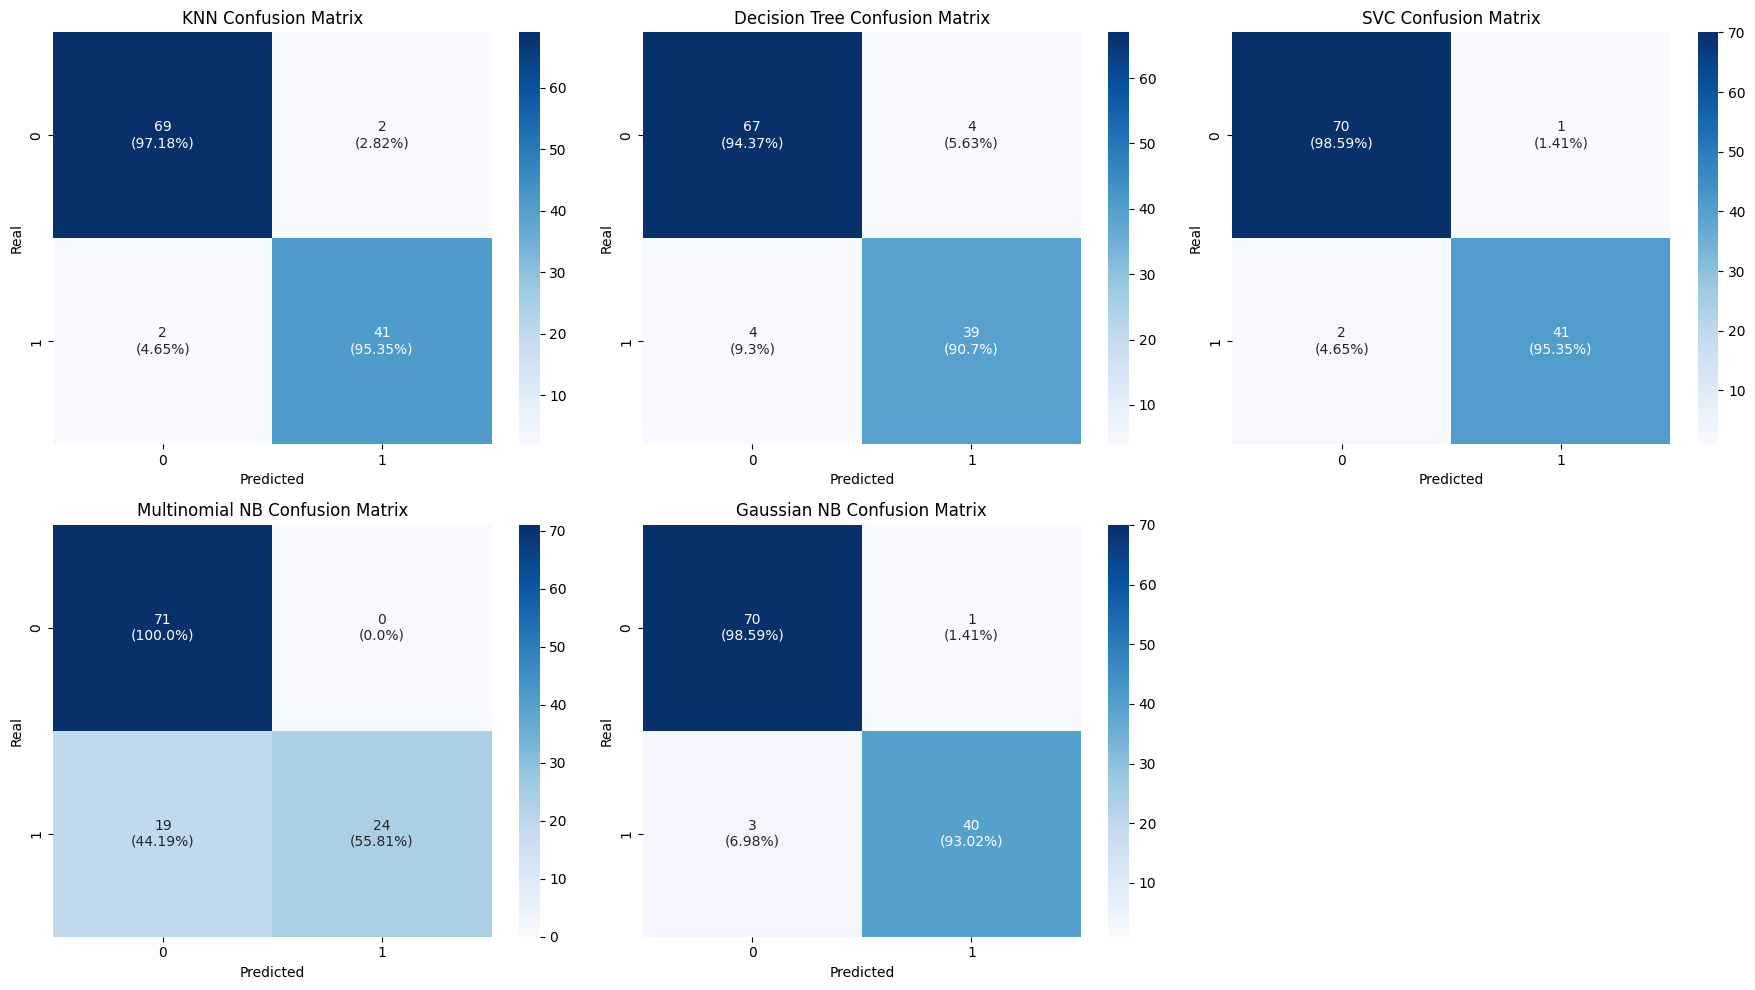

The best model based on Recall is SVC with an AUC of 1.00, Accuracy of 97.37%, Precision of 97.62%, Recall of 95.35%, and F1-Score of 96.47%.

After evaluating the models KNN, Decision Tree, SVC, Multinomial NB, Gaussian NB, we concluded that the SVC model demonstrates the best performance in terms of Recall, which is crucial for cancer diagnosis. High recall ensures that we minimize the false negatives, thereby reducing the risk of missing out on identifying patients who have cancer.

The SVC model not only excels in recall but also shows a good balance in other metrics such as AUC, precision, and F1-score, making it a reliable choice for early and accurate cancer detection.

In cases where models had the same recall, we used the AUC as a tie-breaker to ensure the selection of the model with the best overall performance.

Therefore, we recommend adopting the SVC model for this project due to its robustness and ability to provide accurate and reliable predictions, which is essential fo

In [1001]:
# Function to calculate metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def calculate_metrics(y_test, y_pred, y_pred_prob):
    return {
        'Accuracy': accuracy_score(y_test, y_pred) * 100,
        'AUC': roc_auc_score(y_test, y_pred_prob),
        'Precision': precision_score(y_test, y_pred) * 100,
        'Recall': recall_score(y_test, y_pred) * 100,
        'F1-Score': f1_score(y_test, y_pred) * 100,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# Models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'Decision Tree': DecisionTreeClassifier(),
    'SVC': SVC(probability=True),
    'Multinomial NB': MultinomialNB(),
    'Gaussian NB': GaussianNB()
}

results = []

# Train and calculate metrics for each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(x_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(x_test)
    else:
        y_pred_prob = y_pred  # Fallback for models that don't support predict_proba or decision_function
    
    metrics = calculate_metrics(y_test, y_pred, y_pred_prob)
    metrics['Model'] = model_name
    results.append(metrics)

# Create DataFrame with results
results_df = pd.DataFrame(results)
print(results_df[['Model', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1-Score']])

# Compare confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot confusion matrices
for idx, result in enumerate(results):
    cm = result['Confusion Matrix']
    total = cm.sum(axis=1)[:, np.newaxis]
    cm_percent = (cm / total * 100).round(2)

    # Create a combined matrix with absolute values and percentages
    combined = np.empty(cm.shape, dtype=object)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            combined[i, j] = f"{cm[i, j]}\n({cm_percent[i, j]}%)"

    sns.heatmap(cm, annot=combined, fmt='', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"{result['Model']} Confusion Matrix")
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Real')

# Remove any unused subplots
for i in range(len(results), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Justification for choosing the best model based on Recall
best_model = results_df.loc[results_df['Recall'].idxmax()]
tied_models = results_df[results_df['Recall'] == best_model['Recall']]
if len(tied_models) > 1:
    best_model = tied_models.loc[tied_models['AUC'].idxmax()]

best_model_name = best_model['Model']
print(f"The best model based on Recall is {best_model_name} with an AUC of {best_model['AUC']:.2f}, Accuracy of {best_model['Accuracy']:.2f}%, Precision of {best_model['Precision']:.2f}%, Recall of {best_model['Recall']:.2f}%, and F1-Score of {best_model['F1-Score']:.2f}%.")

# Elaboration of justification
decision_justification = f"""
After evaluating the models {', '.join(results_df['Model'])}, we concluded that the {best_model_name} model demonstrates the best performance in terms of Recall, which is crucial for cancer diagnosis. High recall ensures that we minimize the false negatives, thereby reducing the risk of missing out on identifying patients who have cancer.

The {best_model_name} model not only excels in recall but also shows a good balance in other metrics such as AUC, precision, and F1-score, making it a reliable choice for early and accurate cancer detection.

In cases where models had the same recall, we used the AUC as a tie-breaker to ensure the selection of the model with the best overall performance.

Therefore, we recommend adopting the {best_model_name} model for this project due to its robustness and ability to provide accurate and reliable predictions, which is essential for assisting in the early diagnosis and effective treatment of breast cancer.
"""

print(decision_justification)

We can also use `lazypredict` to compare various models:

In [1002]:
model_lazy = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models_lazy, predictions_lazy = model_lazy.fit(x_train, x_test, y_train, y_test)
models_lazy

100%|██████████| 29/29 [00:01<00:00, 24.04it/s]

[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.98,0.98,0.98,0.98,0.01
PassiveAggressiveClassifier,0.98,0.98,0.98,0.98,0.01
SVC,0.98,0.98,0.98,0.98,0.02
Perceptron,0.97,0.97,0.97,0.97,0.01
LogisticRegression,0.97,0.97,0.97,0.97,0.01
AdaBoostClassifier,0.97,0.97,0.97,0.97,0.12
SGDClassifier,0.96,0.97,0.97,0.97,0.01
ExtraTreeClassifier,0.96,0.97,0.97,0.97,0.01
CalibratedClassifierCV,0.97,0.97,0.97,0.97,0.02
